In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


In [2]:
img_path = r'Merged-images/img242.jpg'
img = cv2.imread(img_path)

In [3]:
#plt.imshow(img)


In [4]:
#plt.imshow(cropped_image)

In [5]:
def img2binary(img_path,threshold=135):
    """This function takes in an image path /(relative or absolute/) as a string and converts it to a binary mask"""
    img = cv2.imread(img_path)
    imgray = cv2.cvtColor(img,cv2.cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(imgray,threshold,255,cv2.THRESH_BINARY_INV)
    return binary

In [6]:
def binaryStats(binary):
    """This function takes in a binary image and returns the percent cover of white pixels and a sorted contour list"""
    white_pix = np.sum(binary == 255)
    black_pix = np.sum(binary == 0)
    total = binary.shape[0]*binary.shape[1]
    percentcover = (white_pix/total)*100
    contours, _ = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(contours, key=cv2.contourArea)
    return percentcover, cnt

In [7]:
directory = 'Merged-images'

In [467]:
#pcarray = []
contours=[]
dpi=300
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        binary=img2binary(f,154)
        binary2 = binary[0:3300, 250:2552]
        total = binary2.shape[0]*binary2.shape[1]
        PC,cnt = binaryStats(binary2)
        #pcarray.append(PC)
        contours.append([filename,PC,cnt,[round(20*(np.sqrt(((cv2.contourArea(i)+1)*84.667)/np.pi)),4)for i in cnt]])

In [440]:
#imgID

In [441]:
#pcarray

In [442]:
#df = pd.DataFrame(list(zip(*imgID))[1],index=list(zip(*imgID))[0])

In [443]:
#df.to_excel('threshold.xlsx',df)

In [468]:
df2 = pd.DataFrame(contours,columns=['imageID','PercentCover','contours','diameter(um)'])

In [469]:
#len(df2['areas(um)'][1])

In [470]:
df2['count']=df2['diameter(um)'].str.len()

In [479]:
df3=df2.drop('contours', axis=1)

In [480]:
df3=df3.sort_values('imageID')

In [481]:
#df3['imageID']

In [482]:
df3['median_diam(um)']=df3['imageID']
df3['mean_diam']=df3['imageID']
df3['10th_diam']=df3['imageID']
df3['90th_diam']=df3['imageID']
df3['min_diam']=df3['imageID']
df3['max_diam']=df3['imageID']

In [483]:
for i in range(0,len(df3)):
    df3['median_diam(um)'][i]=np.median(df3['diameter(um)'][i])
    df3['mean_diam'][i]=np.mean(df3['diameter(um)'][i])
    df3['10th_diam'][i]=df3['diameter(um)'][i][int(len(df3['diameter(um)'][i])*.1)]
    df3['90th_diam'][i]=df3['diameter(um)'][i][int(len(df3['diameter(um)'][i])*.9)]
    df3['min_diam'][i]=np.min(df3['diameter(um)'][i])
    df3['max_diam'][i]=np.max(df3['diameter(um)'][i])

/var/folders/nt/yd6hw88x2z13hqqdd6x5xgp00000gn/T/ipykernel_95758/2165573647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['median_diam(um)'][i]=np.median(df3['diameter(um)'][i])
/var/folders/nt/yd6hw88x2z13hqqdd6x5xgp00000gn/T/ipykernel_95758/2165573647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['mean_diam'][i]=np.mean(df3['diameter(um)'][i])
/var/folders/nt/yd6hw88x2z13hqqdd6x5xgp00000gn/T/ipykernel_95758/2165573647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [484]:
#df3

In [485]:
df4=df3.drop('diameter(um)', axis=1)

In [491]:
np.median(df4['mean_diam'])

251.81251910411083

In [496]:
test=df3.loc[df3['imageID']=='img369.jpg','diameter(um)']
#_=plt.hist(test,bins=200)
test

64    [103.8274, 103.8274, 103.8274, 103.8274, 103.8...
Name: diameter(um), dtype: object

In [153]:
#max(df3['areas(um)'][0])

41.0634

In [488]:
df4.to_excel('spray_size_sheet_diameter.xlsx')

In [376]:
img_path = r'/Users/calebhenderson/Documents/SprayDep/Merged-images/img179.jpg'
img = cv2.imread(img_path)

In [377]:
binary = img2binary(img_path,154)

In [378]:
pc,contours = binaryStats(binary)

In [379]:
_=cv2.drawContours(img, contours, -1, (0,0,255),2)

In [380]:
#plt.imshow(img)

In [381]:
cv2.imwrite('this.png',img)

True

In [382]:
cnt = [cv2.contourArea(i)+1 for i in contours[:-3]]

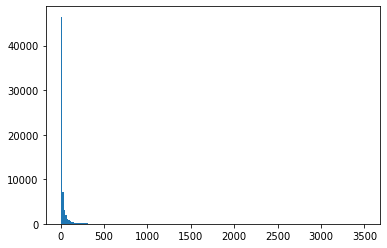

In [383]:
_=plt.hist(cnt,bins=200)